In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
df = pd.read_csv('data/KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.


In [3]:
X = pd.get_dummies(df, columns = ['age', 'gender'])
X.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1


##  Using a heat map to show the correlation in the data.

<AxesSubplot:>

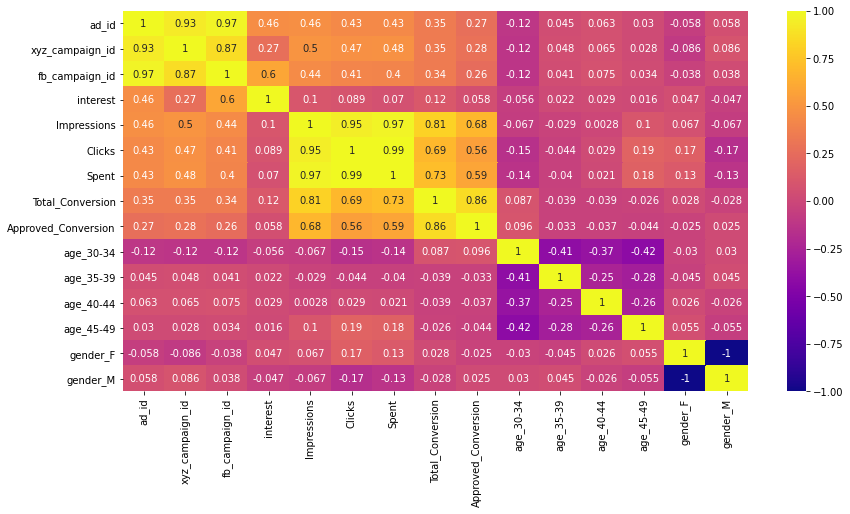

In [4]:
corr = X.corr()
corr
plt.figure(figsize= (14,7))
sns.heatmap(corr,annot = True, cmap ='plasma' )

#### Drop the first 4 columns in the data frame X.

In [5]:
X = X.drop(labels = ['ad_id','xyz_campaign_id','fb_campaign_id'], axis = 1)

#### Basing your answer on what can be seen in the heat map, why did we drop these columns?

In [6]:
## They are unique identifiers. The variables does not provide much information  into our anaysis

## Using the elbow method:

#### Determine the best number of clusters for the data in the range of 2 to 20.

In [7]:
X.head()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,20,693,0,0.00,1,0,1,0,0,0,0,1
3,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [8]:
X_features = df[['Total_Conversion', 'Approved_Conversion']]

In [9]:
from sklearn.cluster import KMeans

x = []

for i in range(2,20):
    km = KMeans(n_clusters = i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state = 34)
    km.fit(X)
    x.append(km.inertia_)

#### Also include the graphical plot for the elbow curve.

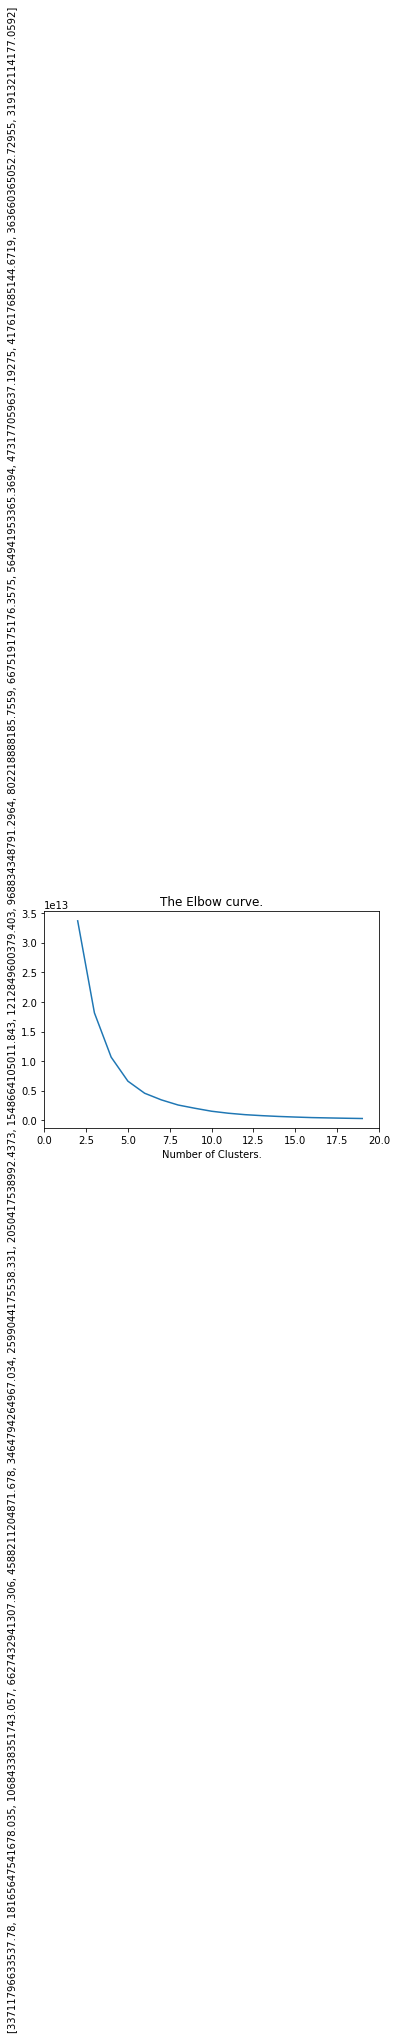

In [10]:
# plt.figure(figsize= (13,7))
plt.plot(range(2,20), x)
plt.title('The Elbow curve.')
plt.ylabel(x)
plt.xlabel('Number of Clusters.')
plt.xlim(0,20)
plt.show()

## Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [11]:
km = KMeans(n_clusters = 5)


## Use the model to predict the labels from the data and save them to variable y_means.

In [12]:
y_means = km.fit_predict(X)

In [13]:
y_means

array([0, 0, 0, ..., 2, 4, 4], dtype=int32)

In [14]:
km.labels_ 

array([0, 0, 0, ..., 2, 4, 4], dtype=int32)

## Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

In [15]:
df['Advert_Type'] = y_means

In [16]:
df.head(4)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0


##  Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:

#### Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

In [19]:
import seaborn as sns

#### Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

<AxesSubplot:xlabel='gender', ylabel='Spent'>

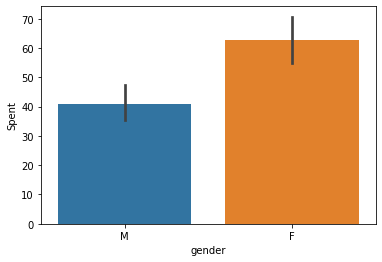

In [24]:
sns.barplot(x= 'gender',y ='Spent', data = df)

In [25]:
data = df.groupby("gender")["Spent"].sum()
data

gender
F    34502.619963
M    24202.609995
Name: Spent, dtype: float64

<AxesSubplot:ylabel='Spent'>

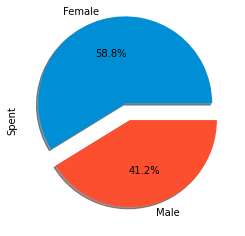

In [37]:

labels = 'Female', 'Male'
colors = ['#008fd5', '#fc4f30']
data.plot.pie(autopct="%.1f%%", shadow = True,colors = colors, labels = labels ,explode =(0.2,0))


#### Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

In [43]:
data1 = df.groupby('age')['Advert_Type'].sum()
data1

age
30-34    283
35-39    181
40-44    190
45-49    267
Name: Advert_Type, dtype: int32